# Examining the TensorFlow Graph

## 0. Overview

## 1. Setup

In [1]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.4.1


In [2]:
import tensorboard
tensorboard.__version__

'2.4.1'

## 2. Define a Keras model

In [3]:
# In this example, the classifier is a simple four-layer Sequential model.


# Define the model.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [4]:
# Download and prepare the training data.

(train_images, train_labels), _ = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0

## 3. Train the model and log data

In [5]:
# Before training, define the Keras TensorBoard callback, specifying the log directory. 
# By passing this callback to Model.fit(), you ensure that graph data is logged for visualization in TensorBoard.


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model.
model.fit(
    train_images,
    train_labels, 
    batch_size=64,
    epochs=5, 
    callbacks=[tensorboard_callback])

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.9367 - accuracy: 0.6786
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4984 - accuracy: 0.8245
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4486 - accuracy: 0.8392
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4367 - accuracy: 0.8445
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4076 - accuracy: 0.8531


## 4. Op-level graph

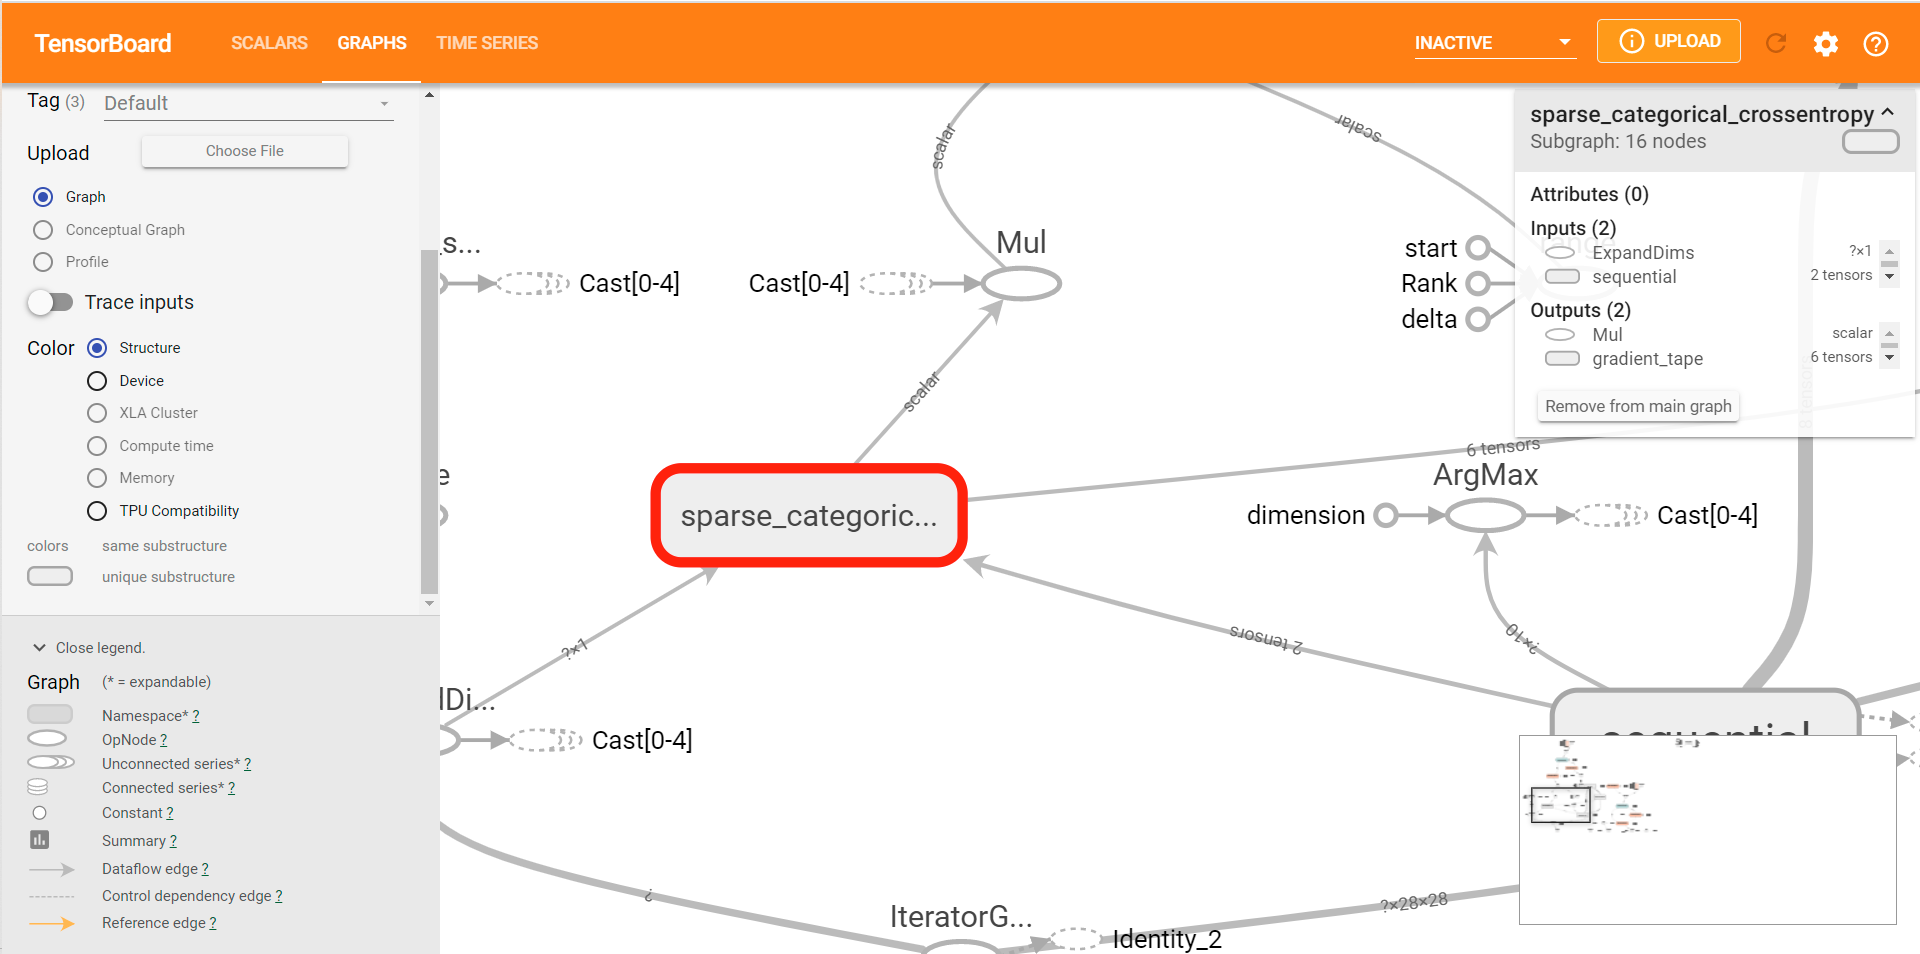

In [6]:
from IPython.display import Image, display
display(Image(filename="./image/graph.png", embed=True))

## 5. Conceptual graph

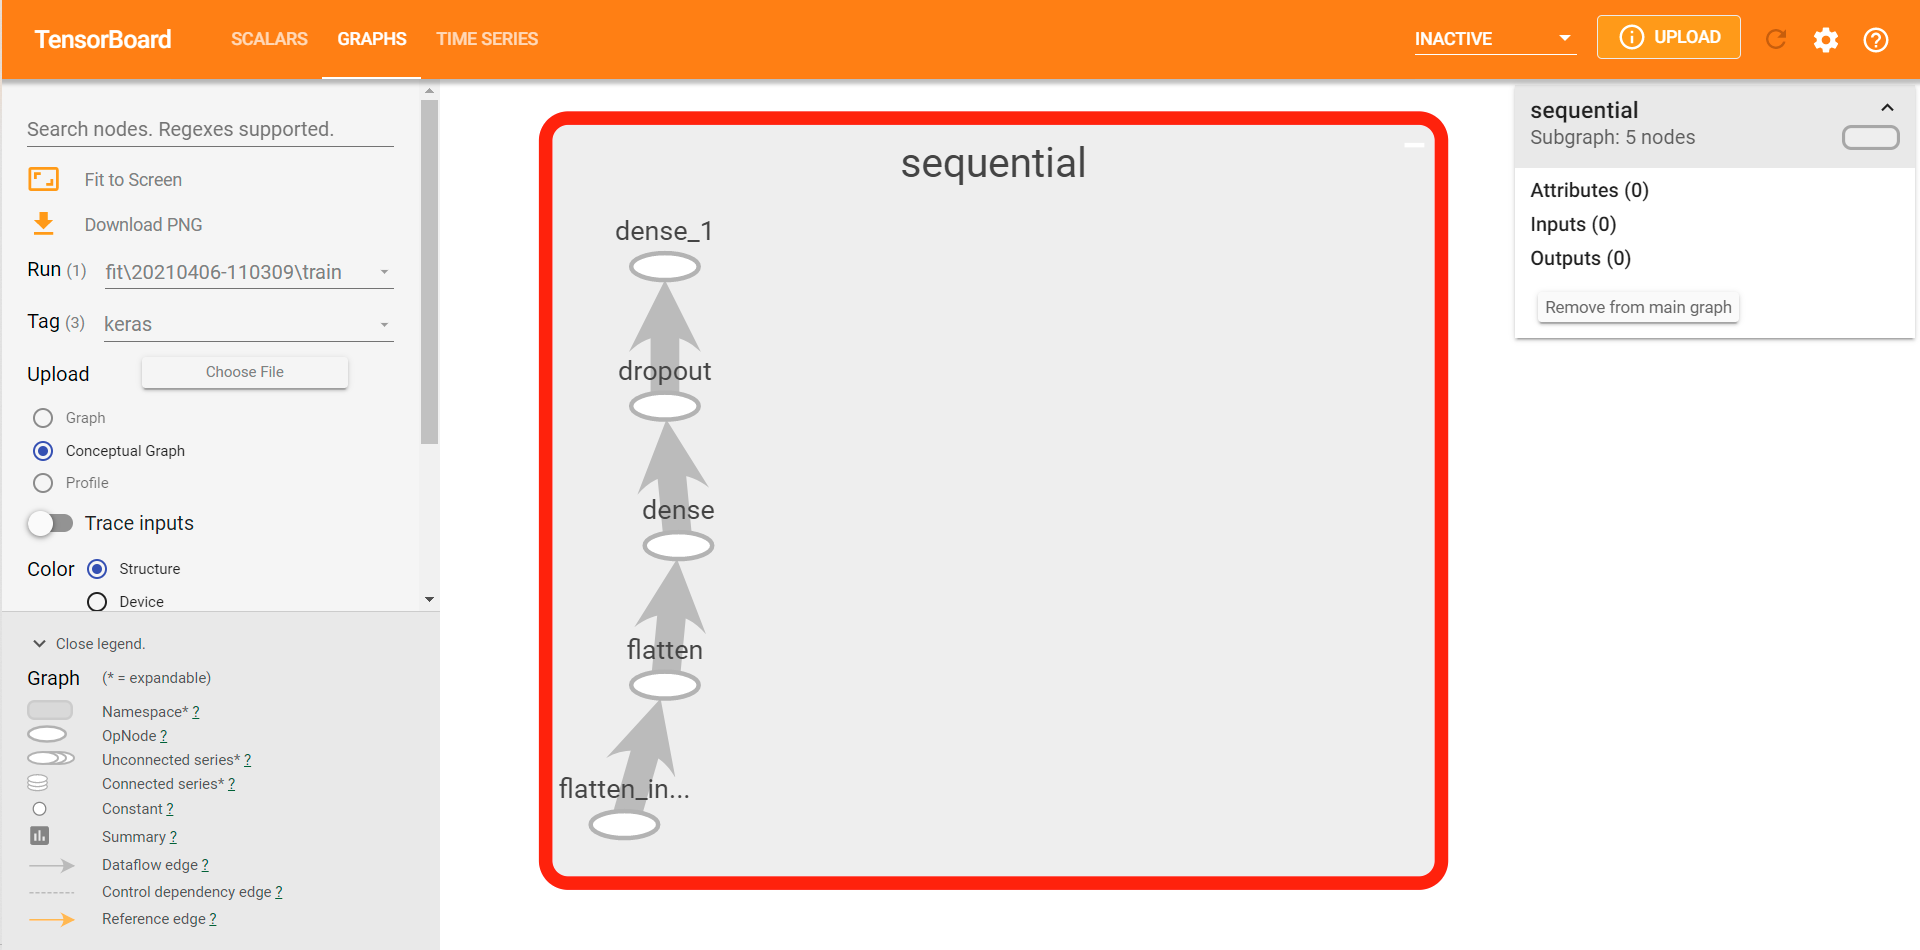

In [7]:
from IPython.display import Image, display
display(Image(filename="./image/graph2.png", embed=True))

## 6. Graphs of tf.functions

In [8]:
# The function to be traced.
@tf.function
def my_func(x, y):
  # A simple hand-rolled layer.
  return tf.nn.relu(tf.matmul(x, y))

# Set up logging.
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/func/%s' % stamp
writer = tf.summary.create_file_writer(logdir)

# Sample data for your function.
x = tf.random.uniform((3, 3))
y = tf.random.uniform((3, 3))

# Bracket the function call with
# tf.summary.trace_on() and tf.summary.trace_export().
tf.summary.trace_on(graph=True, profiler=False)
# start frofiler
tf.profiler.experimental.start(logdir)
# Call only one tf.function when tracing.
z = my_func(x, y)
with writer.as_default():
  tf.summary.trace_export(
      name="my_func_trace",
      step=0,
      profiler_outdir=logdir)
  
# stop frofiler
tf.profiler.experimental.stop()

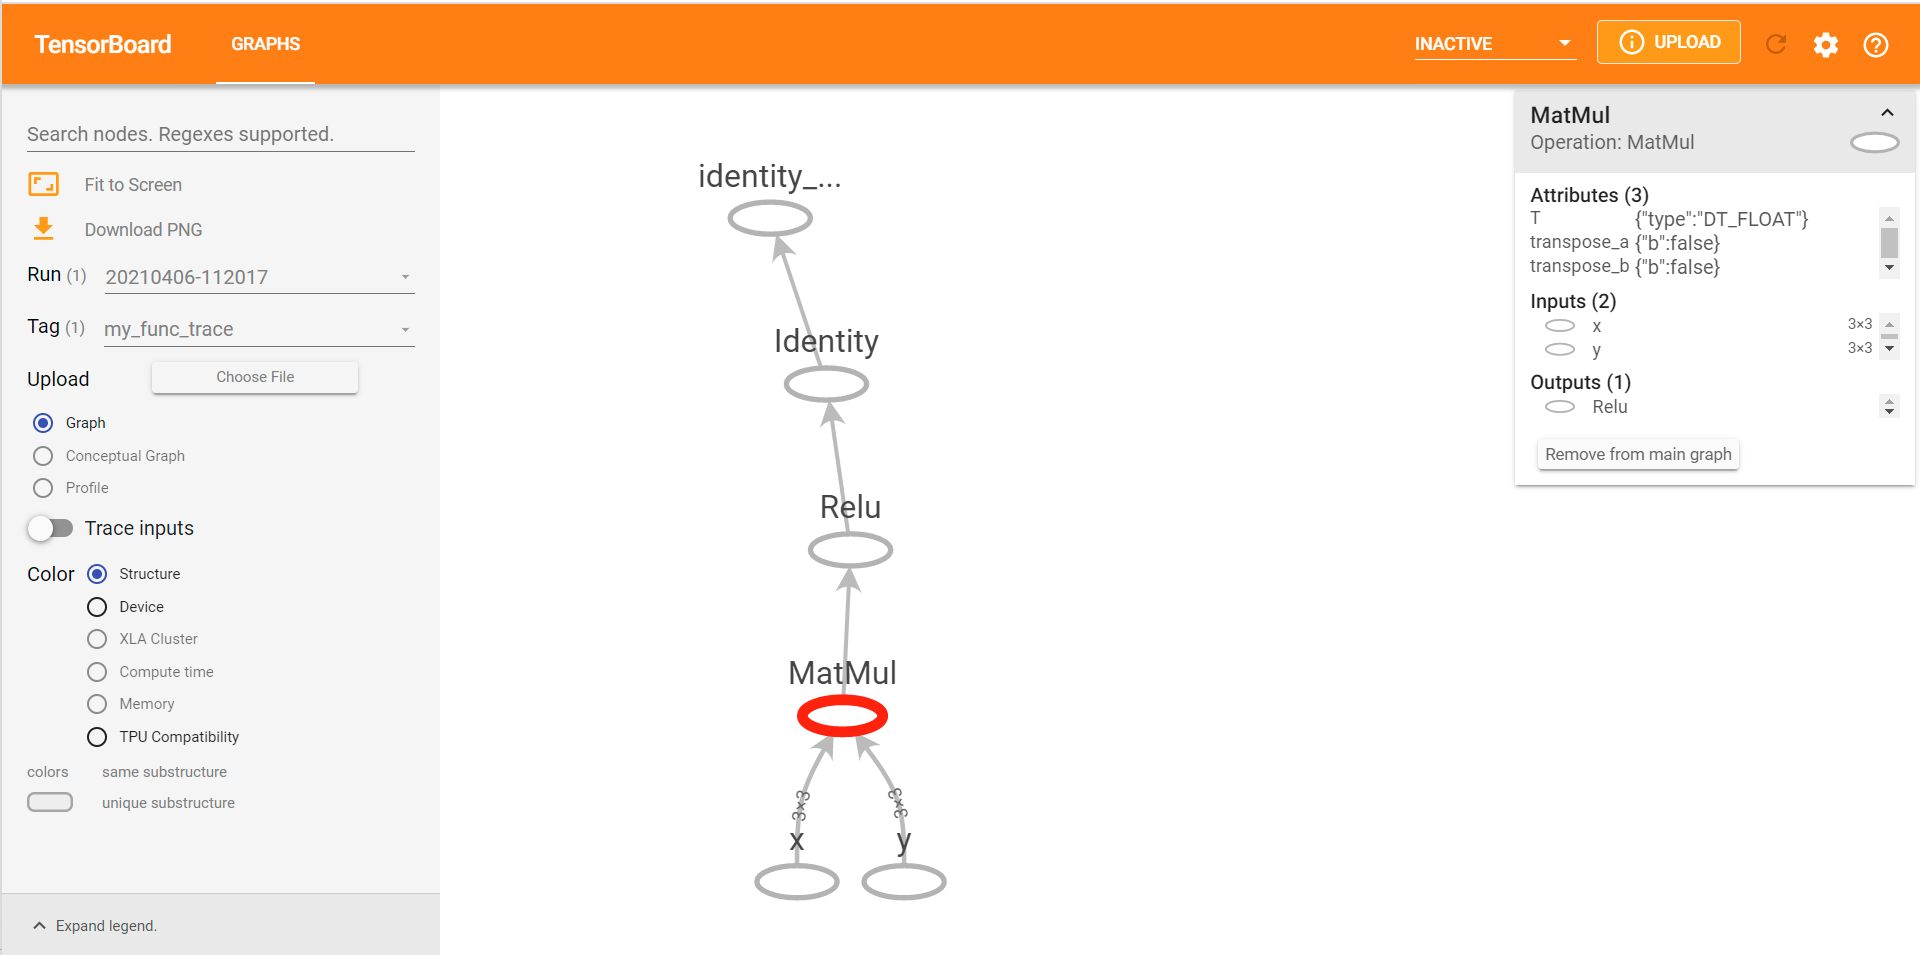

In [10]:
from IPython.display import Image, display
display(Image(filename="./image/graph3.png", embed=True))

# reference

### https://tensorflow.google.cn/tensorboard/graphs